# Delays and offsets

To validate our results we look at different delays and offsets. The goal here is to analyse the effect of different prior delays and different game offsets.

In [7]:
""" Imports
"""
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import arviz as az

sys.path.append("../")
sys.path.append("../covid19_inference/")

import covid19_inference as cov19
import covid19_soccer


""" Matplotlib config
"""
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams["figure.figsize"] = [3.4, 2.7]  # APS single column
matplotlib.rcParams["figure.dpi"] = 300  # this primarily affects the size on screen
#matplotlib.rcParams['axes.linewidth'] = 0.3
matplotlib.rcParams["axes.labelcolor"] = "black"
matplotlib.rcParams["axes.edgecolor"] = "black"
matplotlib.rcParams["xtick.color"] = "black"
matplotlib.rcParams["ytick.color"] = "black"
matplotlib.rcParams["xtick.labelsize"] = 8
matplotlib.rcParams["ytick.labelsize"] = 8
matplotlib.rcParams["axes.labelsize"] = 8
matplotlib.rcParams["axes.titlesize"]= 10
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["legend.title_fontsize"] = 8

""" General configs
"""
fig_path = "./figures"
countries = ["England","Scotland","Germany","France"]
tune=200
draws=300
max_treedepth=10
""" Utiliy functions
"""
# Load traces
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)


## Simple analysis only varying one parameter offset or delay respectivly

In [42]:
# Offset
offsets = [-8, -6, -4, -2, 1, 0, 1, 2, 4, 6, 8, 28]
models, traces, dls = [],[],[]

country = "Scotland"
for offset in offsets:
    fstr=(f"/data.nst/jdehning/covid_uefa_traces/UEFA"+
        f"-beta=False"+
        f"-country={country}"+
        f"-offset_games={offset}"+
        f"-draw_delay=True"+
        f"-weighted_alpha_prior=0"+
        f"-prior_delay=-1"+
        f"-width_delay_prior=0.1"+
        f"-sigma_incubation=-1.0"+
        f"-tune={tune}"+
        f"-draws={draws}"+
        f"-max_treedepth={max_treedepth}.pickled")   
    model, trace = load(fstr)
    dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
    
    models.append(model)
    traces.append(trace)
    dls.append(dl)

Compute loo score for each trace

In [43]:
loo_scores = []
for trace in traces:
    loo_scores.append(az.loo(trace))

/home/smohr/anaconda3/envs/uefa/lib/python3.9/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/smohr/anaconda3/envs/uefa/lib/python3.9/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/smohr/anaconda3/envs/uefa/lib/python3.9/si

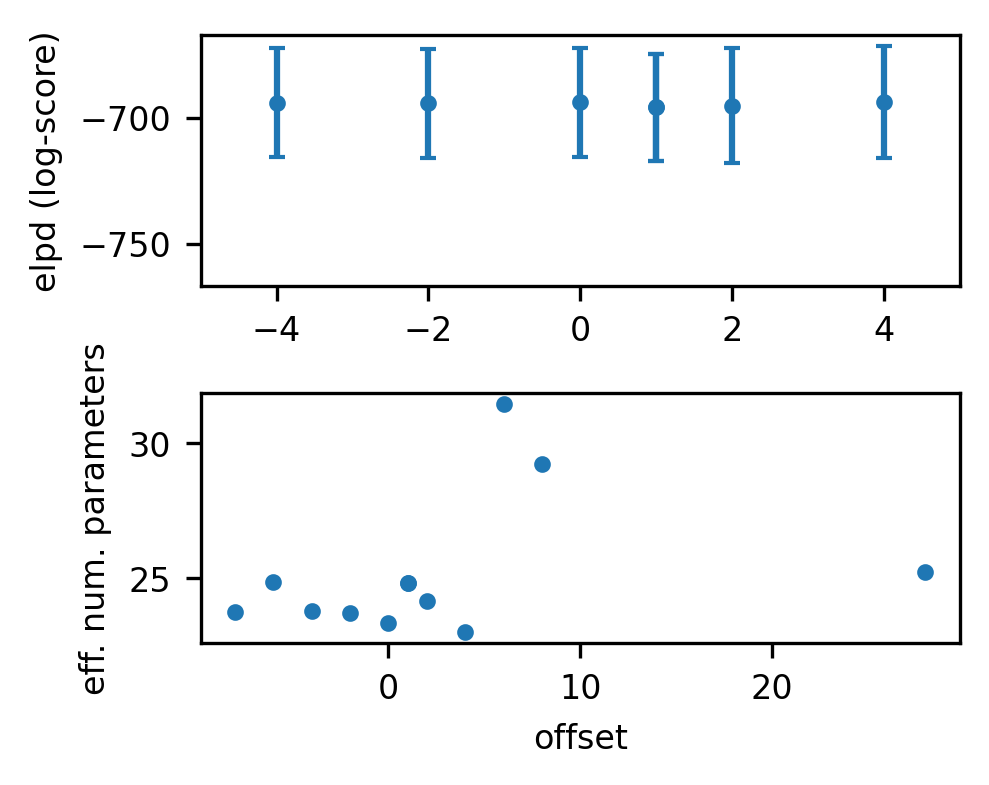

In [45]:
fig,axes = plt.subplots(2,1)

axes[0].errorbar(x=offsets,y=[l.loo for l in loo_scores],yerr=[l.loo_se*1.96 for l in loo_scores],ls="",marker=".",capsize=2)
axes[1].scatter(offsets,[l.p_loo for l in loo_scores],marker=".")
axes[1].set_xlabel("offset")
axes[0].set_ylabel("elpd (log-score)")
axes[1].set_ylabel("eff. num. parameters")

fig.tight_layout()

axes[0].set_xlim(-5,5)

plt.show()
plt.close()

In [46]:
# Delay
delays = [-1, 2, 4, 6, 8, 10, 12]
models, traces, dls = [],[],[]

country = "Scotland"
for delay in delays:
    fstr=(f"/data.nst/jdehning/covid_uefa_traces/UEFA"+
        f"-beta=False"+
        f"-country={country}"+
        f"-offset_games=0"+
        f"-draw_delay=True"+
        f"-weighted_alpha_prior=0"+
        f"-prior_delay={delay}"+
        f"-width_delay_prior=0.1"+
        f"-sigma_incubation=-1.0"+
        f"-tune={tune}"+
        f"-draws={draws}"+
        f"-max_treedepth={max_treedepth}.pickled")   
    model, trace = load(fstr)
    dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
    
    models.append(model)
    traces.append(trace)
    dls.append(dl)

In [47]:
loo_scores = []
for trace in traces:
    loo_scores.append(az.loo(trace))

/home/smohr/anaconda3/envs/uefa/lib/python3.9/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


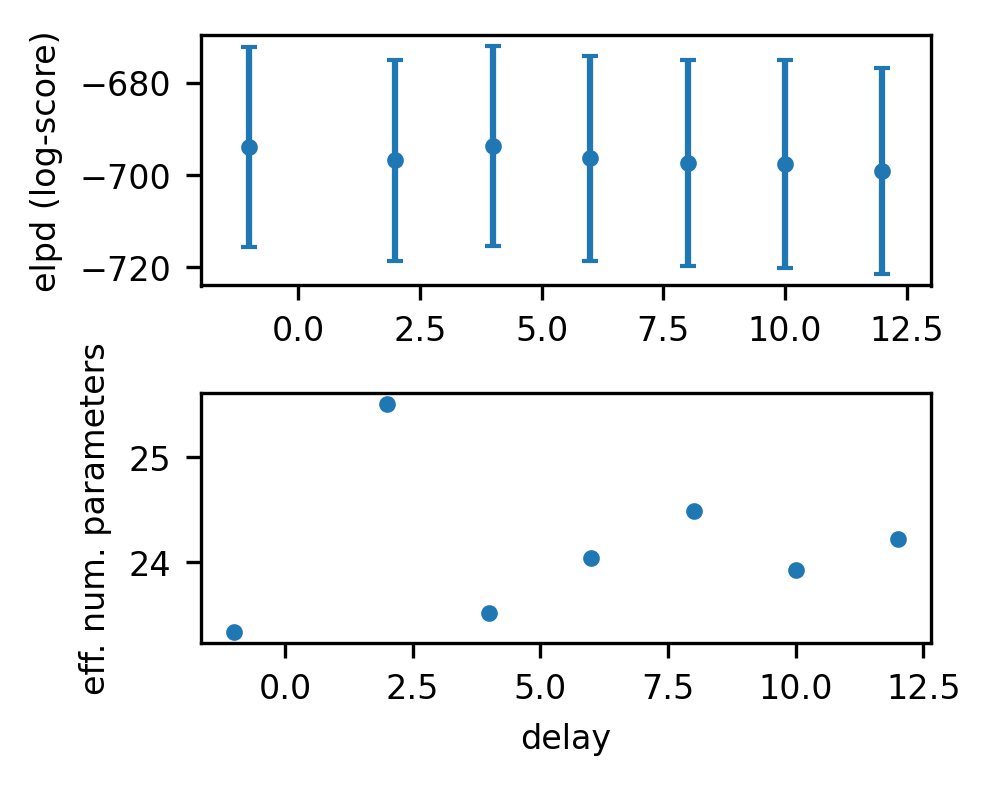

In [57]:
fig,axes = plt.subplots(2,1)

axes[0].errorbar(x=delays,y=[l.loo for l in loo_scores],yerr=[l.loo_se*1.96 for l in loo_scores],ls="",marker=".",capsize=2)
axes[1].scatter(delays,[l.p_loo for l in loo_scores],marker=".")
axes[1].set_xlabel("delay")
axes[0].set_ylabel("elpd (log-score)")
axes[1].set_ylabel("eff. num. parameters")

fig.tight_layout()

axes[0].set_xlim(-2,13)

plt.show()
plt.close(fig=fig)